In [1]:
tasmia = "In the name of Allah, the most Benoficient, the most Merciful"
print(tasmia)

In the name of Allah, the most Benoficient, the most Merciful


### Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (18, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

### Import Dataset

In [3]:
google = pd.read_csv("google.csv")
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


**Google Data Information**

In [4]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


**Convert String Date to DateTime Format**

In [5]:
google["Date"] = pd.to_datetime(google["Date"])

**Set Date as Index**

In [6]:
google.set_index("Date", inplace = True)
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


**Plotting the Google Close Stock Time Series**

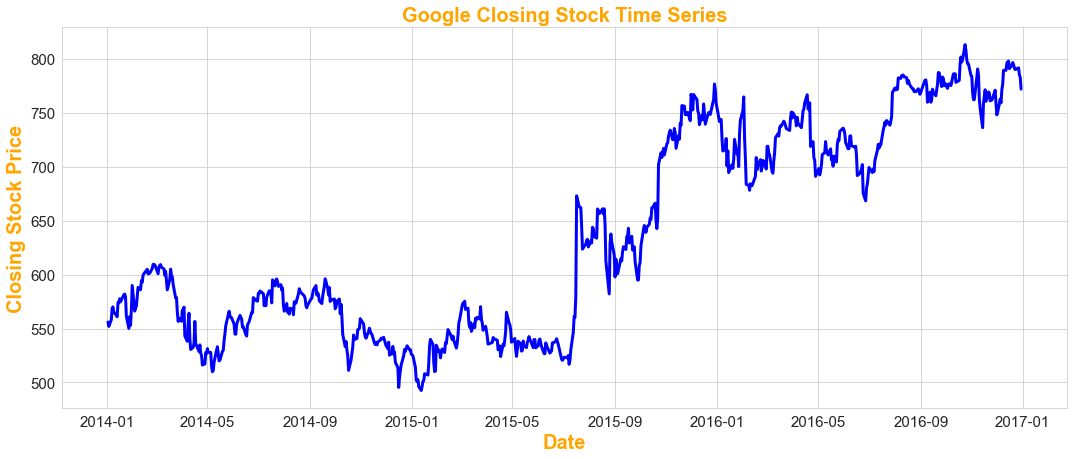

In [7]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = google.index, y = "Close", data = google, color = "blue", linewidth = 3)
plt.title("Google Closing Stock Time Series", color = "orange", size = 20, weight = "bold")
plt.xlabel("Date", color = "orange", size = 20, weight = "bold")
plt.ylabel("Closing Stock Price", color = "orange", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Partial String Indexing**

In [8]:
google.loc["2014-01-01": "2014-01-20"]

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
2014-01-09,564.55
2014-01-10,564.52


**Get specific data**

In [9]:
google.loc["2015-09-03", "Close"]

606.25

**Convert DateTimeIndex to frequencies**

In [10]:
gb = google.asfreq("B")
gb.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


**90 Days future values**

In [11]:
gb["Future"] = gb["Close"].shift(periods = -90)
gb.head()

,Close,Future
Date,,
2014-01-02,556.00,511.00
2014-01-03,551.95,518.73
2014-01-06,558.10,529.92
2014-01-07,568.86,533.09
2014-01-08,570.04,526.65


**90 Days past values**

In [12]:
gb["Past"] = gb["Close"].shift(periods = 90)
gb.head()

,Close,Future,Past
Date,,,
2014-01-02,556.00,511.00,NaN
2014-01-03,551.95,518.73,NaN
2014-01-06,558.10,529.92,NaN
2014-01-07,568.86,533.09,NaN
2014-01-08,570.04,526.65,NaN


**Shifting stock prices across time**

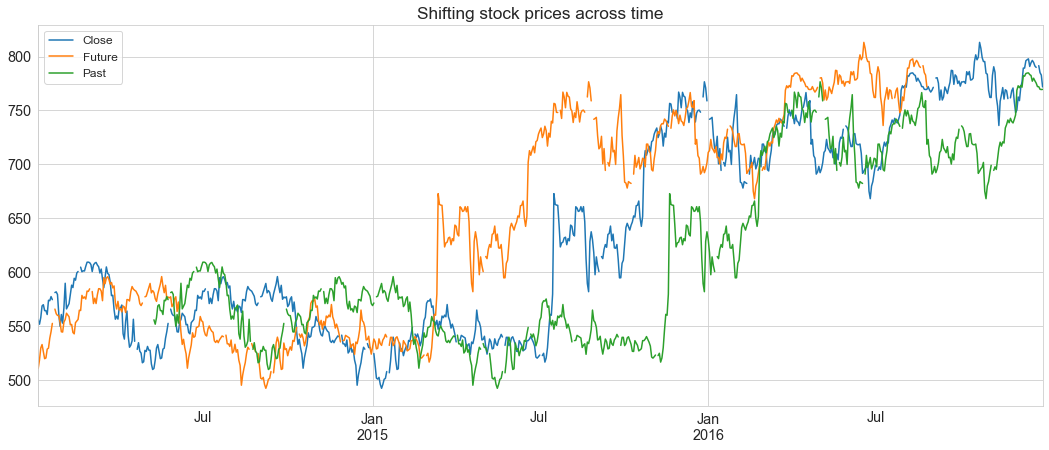

In [13]:
gb.plot(title = "Shifting stock prices across time")
plt.xlabel(None)
plt.show()

**Plotting multi-period returns**

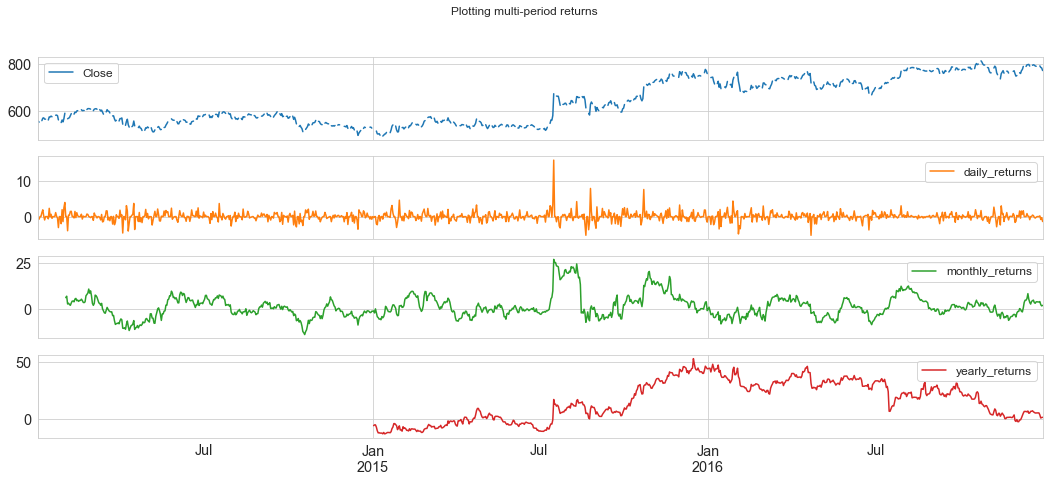

In [14]:
# Daily Returns
google["daily_returns"] = google["Close"].pct_change().mul(100)

# Monthly Returns
google["monthly_returns"] = google["Close"].pct_change(30).mul(100)

# Yearly Returns 
google["yearly_returns"] = google["Close"].pct_change(365).mul(100)

google.plot(subplots= True, title = "Plotting multi-period returns")
plt.xlabel(None)
plt.show()

### NYC Air Quality Data

In [15]:
nyc_air = pd.read_csv("nyc.csv")
nyc_air.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035161,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


**Convert Date to datetime format and set as index**

In [16]:
nyc_air["date"] = pd.to_datetime(nyc_air["date"])
nyc_air.set_index("date", inplace = True)

**Time Series Graph of NYC Air Components**

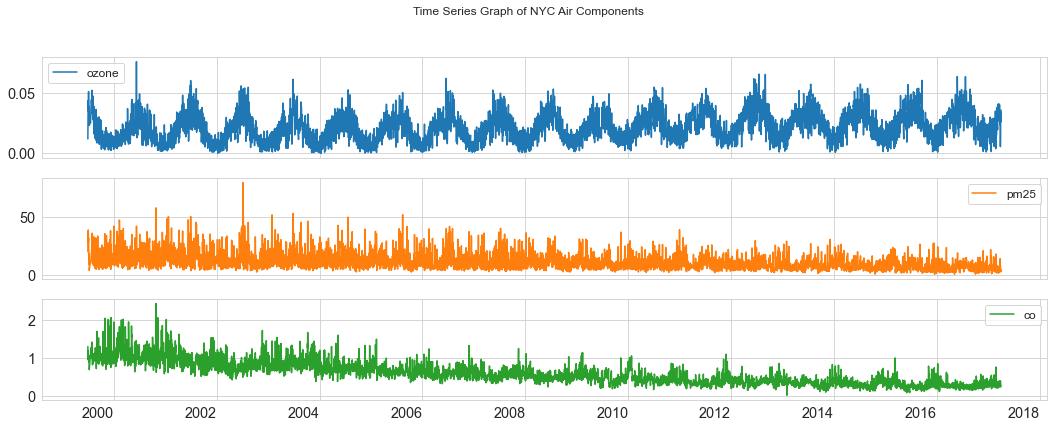

In [17]:
nyc_air.plot(subplots = True, title = "Time Series Graph of NYC Air Components")
plt.xlabel(None)
plt.xticks(rotation = 0)
plt.show()

### Yahoo Stock Price

In [18]:
yahoo = pd.read_csv("yahoo.csv")
yahoo.head()

,date,price
0,2013-01-02,20.08
1,2013-01-03,19.78
2,2013-01-04,19.86
3,2013-01-07,19.40
4,2013-01-08,19.66


**Convert Date to datetime format and set as index**

In [19]:
yahoo["date"] = pd.to_datetime(yahoo["date"])
yahoo.set_index("date", inplace = True)

**Yahoo Stock Price Time Series**

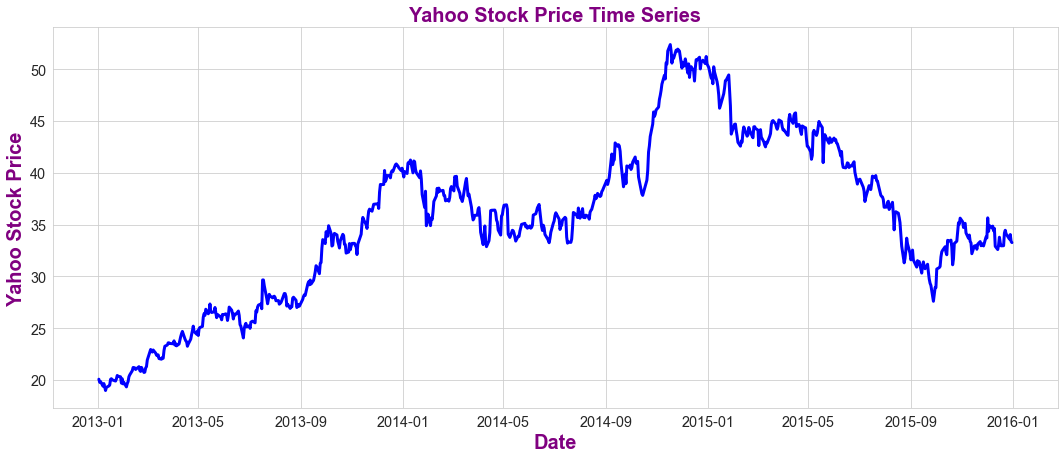

In [20]:
sns.lineplot(x = yahoo.index, y = "price", data = yahoo, color = "blue", linewidth = 3)
plt.title("Yahoo Stock Price Time Series", size = 20, color = "purple", weight = "bold")
plt.xlabel("Date", color = "purple", weight = "bold", size = 20)
plt.ylabel("Yahoo Stock Price", color = "purple", size = 20, weight = "bold")
plt.show()

**Calculating stock price changes**

In [21]:
# price shifted by 30 days into the future.
yahoo["shifted_30"] = yahoo["price"].shift(periods = 30)

# Get the 30-day price difference
yahoo["diff_30"] = yahoo["price"].diff(periods = 30)
yahoo.tail()

,price,shifted_30,diff_30
date,,,
2015-12-25,NaN,32.19,NaN
2015-12-28,33.60,32.94,0.66
2015-12-29,34.04,32.86,1.18
2015-12-30,33.37,32.98,0.39
2015-12-31,33.26,32.62,0.64


### Carbon Monoxides in Cities 

In [22]:
co_cities = pd.read_csv("co_cities.csv")
co_cities.head()

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208
3,2005-01-05,0.348822,0.613814,0.769176
4,2005-01-06,0.572917,0.792596,0.815761


**Convert Date to datetime format and set as index**

In [23]:
co_cities["date"] = pd.to_datetime(co_cities["date"])
co_cities.set_index("date", inplace = True)

**Carbon Monoxide Time Series Daily**

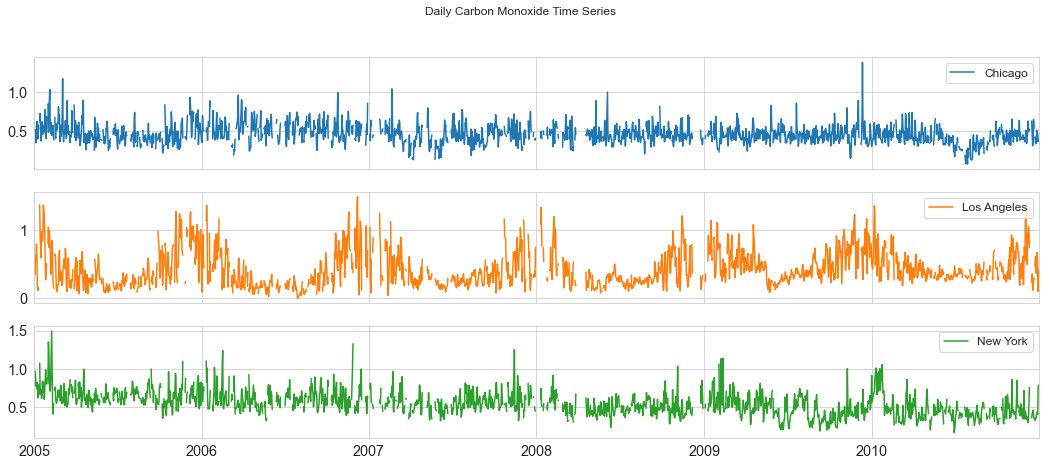

In [24]:
co_cities.asfreq("D").plot(subplots = True, title = "Daily Carbon Monoxide Time Series")
plt.xticks(rotation = 0)
plt.xlabel(None)
plt.show()

**Carbon Monoxide Time Series Monthly**

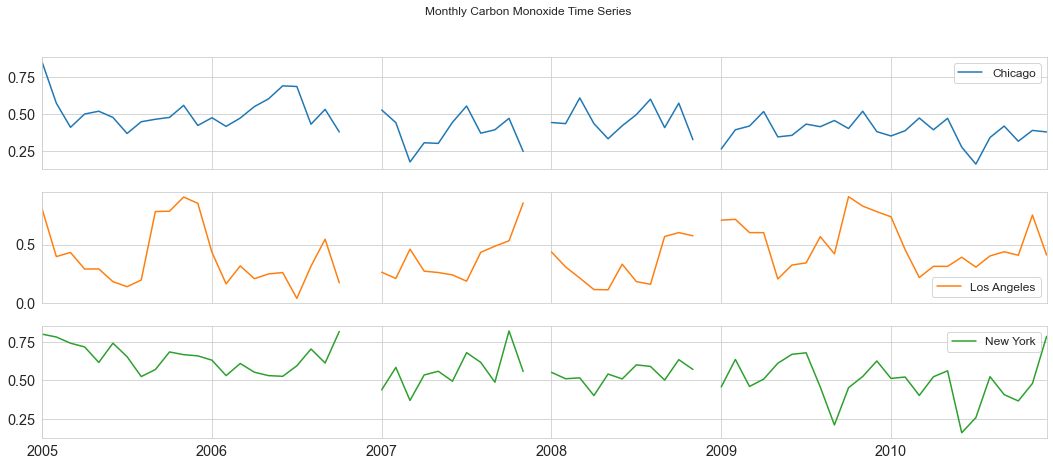

In [25]:
co_cities.asfreq("M").plot(subplots = True, title = "Monthly Carbon Monoxide Time Series")
plt.xticks(rotation = 0)
plt.xlabel(None)
plt.show()

### Compare the performance of several asset classes

In [26]:
prices = pd.read_csv("asset_classes.csv", index_col = "DATE", parse_dates = ["DATE"])
prices.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80


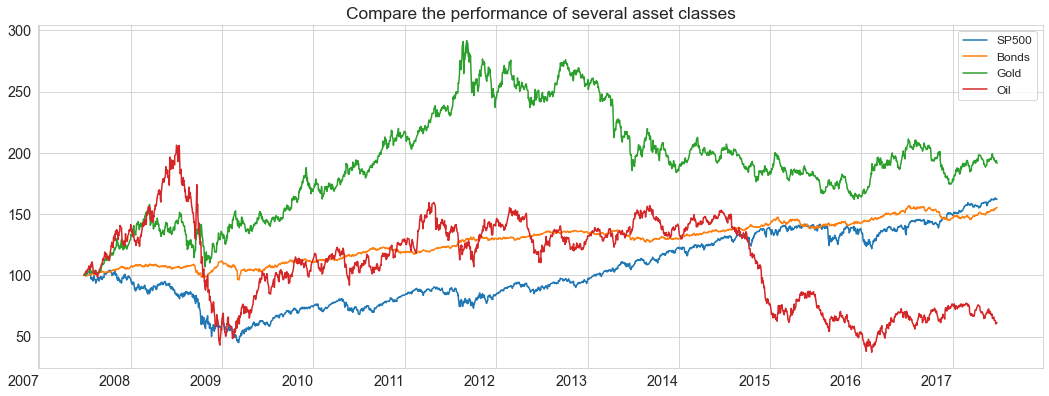

In [27]:
# Select first prices
first = prices.iloc[0]

# Create normalized prices
normalized = prices.div(first).mul(100)

# Plot Normalized
normalized.plot(title = "Compare the performance of several asset classes")
plt.xticks(rotation = 0)
plt.xlabel(None)
plt.show()

### Comparing stock prices with a benchmark

In [28]:
# Import nyse data
nyse = pd.read_csv("nyse.csv", index_col = "date", parse_dates = ["date"])

# Import dow jones data
dow_jones = pd.read_csv("dow_jones.csv", index_col = "date", parse_dates = ["date"])

# Concatenate both data sets
data = pd.concat([nyse, dow_jones], axis = 1)
data.head()

,JNJ,JPM,XOM,DJIA
date,,,,
2010-01-04,64.68,42.85,69.15,10583.96
2010-01-05,63.93,43.68,69.42,10572.02
2010-01-06,64.45,43.92,70.02,10573.68
2010-01-07,63.99,44.79,69.80,10606.86
2010-01-08,64.21,44.68,69.52,10618.19


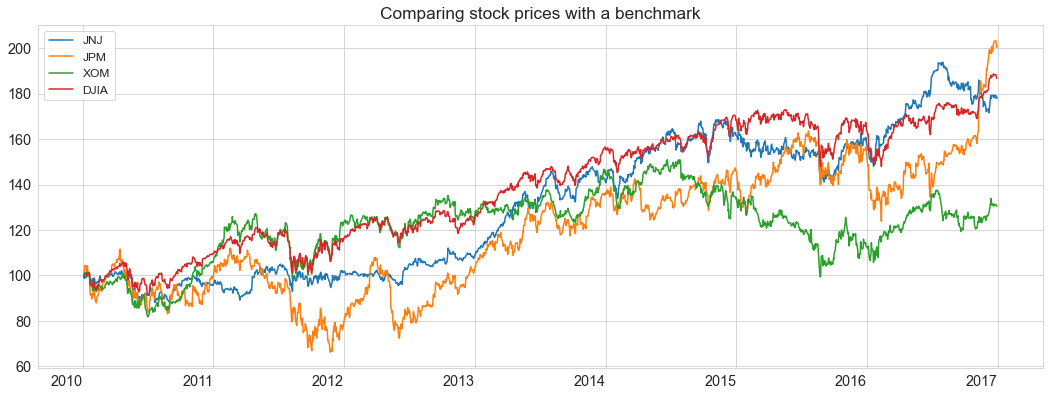

In [29]:
# Normalize Data and plot
data.div(data.iloc[0]).mul(100).plot(title = "Comparing stock prices with a benchmark")
plt.xlabel(None)
plt.xticks(rotation = 0)
plt.show()

### Compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years

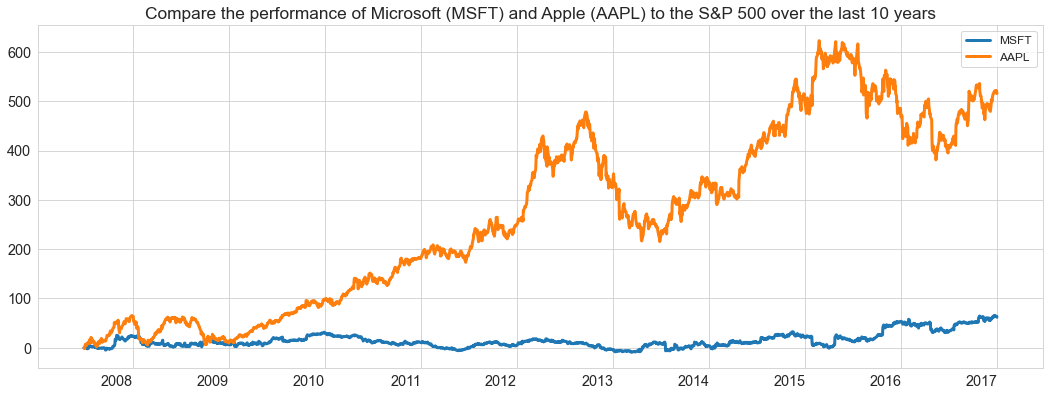

In [30]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
ma = normalized[tickers].sub(normalized['SP500'], axis=0)
ma.plot(title = "Compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years", linewidth = 3)
plt.xlabel(None)
plt.xticks(rotation = 0)
plt.show()

### Create weekly from monthly unemployment data

In [31]:
unemp = pd.read_csv("debt_unemployment.csv", index_col = "date", parse_dates = ["date"])
unemp = unemp[["Unemployment"]]
unemp.head()

,Unemployment
date,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


In [32]:
# Show first five rows of weekly series
unemp.asfreq("W").head()

,Unemployment
date,
2010-01-03,NaN
2010-01-10,NaN
2010-01-17,NaN
2010-01-24,NaN
2010-01-31,NaN


In [33]:
# Show first five rows of weekly series with bfill option
unemp.asfreq("W", method = "bfill").head()

,Unemployment
date,
2010-01-03,9.8
2010-01-10,9.8
2010-01-17,9.8
2010-01-24,9.8
2010-01-31,9.8


In [34]:
# Create weekly series with ffill option and show first five rows
unemp.asfreq("W", method = "ffill").head()

,Unemployment
date,
2010-01-03,9.8
2010-01-10,9.8
2010-01-17,9.8
2010-01-24,9.8
2010-01-31,9.8


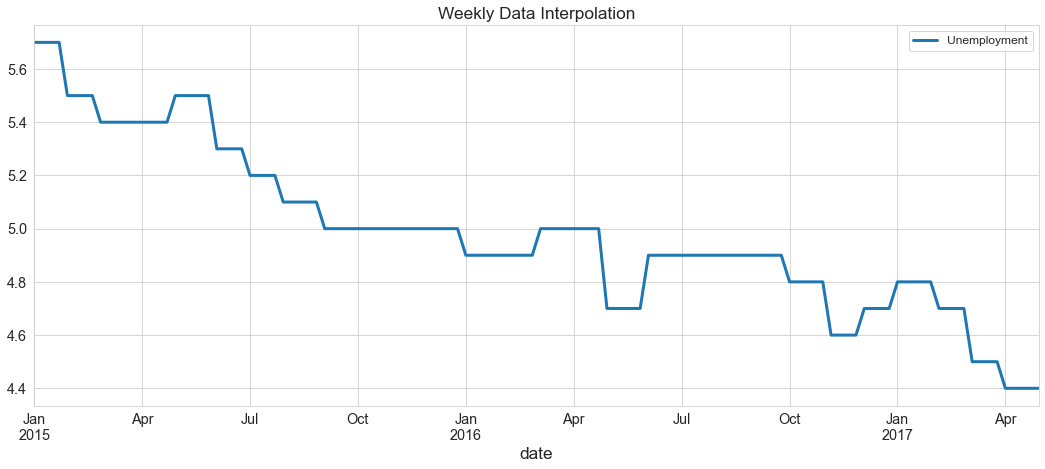

In [35]:
weekly_fill = unemp.asfreq("W", method = "ffill")
weekly_fill["2015":].plot(linewidth = 3, title = "Weekly Data Interpolation")
plt.show()

### Use interpolation to create weekly employment data

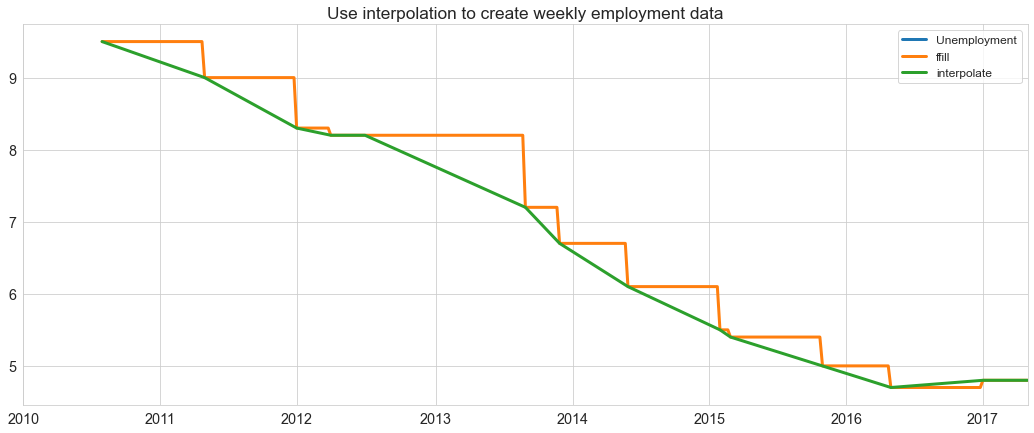

In [36]:
# Weekly Data
weekly = unemp.asfreq("W")

# Create ffill and interpolated columns
weekly["ffill"] = weekly.Unemployment.ffill()
weekly["interpolate"] = weekly.Unemployment.interpolate()

# Plot weekly
weekly.plot(title = "Use interpolation to create weekly employment data", linewidth = 3)
plt.xlabel(None)
plt.show()

### Interpolate debt/GDP and compare to unemployment

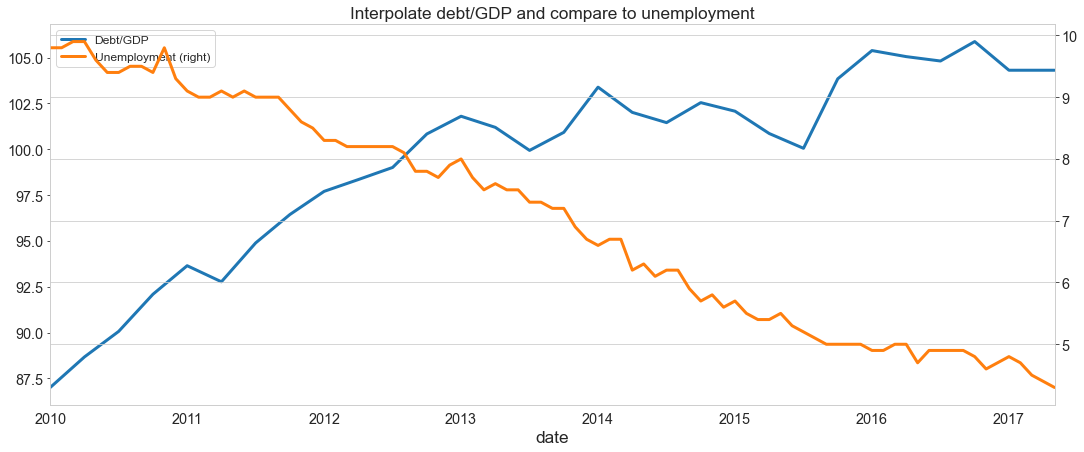

In [37]:
# Import data here
data = pd.read_csv('debt_unemployment.csv', parse_dates=['date'], index_col='date')

# Interpolate Data
interpolated = data.interpolate()

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment', title = "Interpolate debt/GDP and compare to unemployment", linewidth = 3)
plt.xlabel(None)
plt.show()

### Compare weekly, monthly and annual ozone trends for NYC & LA

In [38]:
ozone = pd.read_csv("ozone_nyla.csv", index_col = "date", parse_dates = ["date"])
ozone.head()

,Los Angeles,New York
date,,
2000-01-01,0.008375,0.004032
2000-01-02,NaN,0.009486
2000-01-03,NaN,0.005580
2000-01-04,0.005500,0.008717
2000-01-05,0.005000,0.013754


**Calculate and plot the weekly average ozone trend**

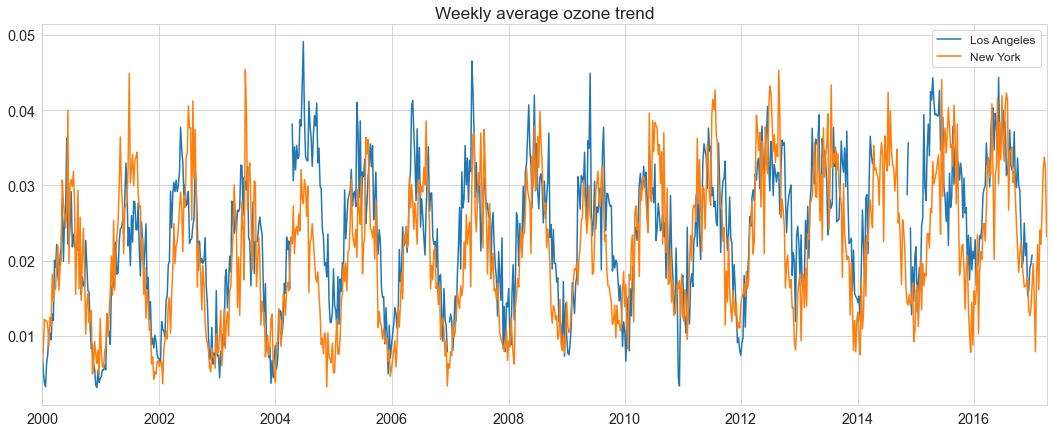

In [39]:
ozone.resample("W").mean().plot(title = "Weekly average ozone trend")
plt.xlabel(None)
plt.show()

**Calculate and plot the monthly average ozone trend**

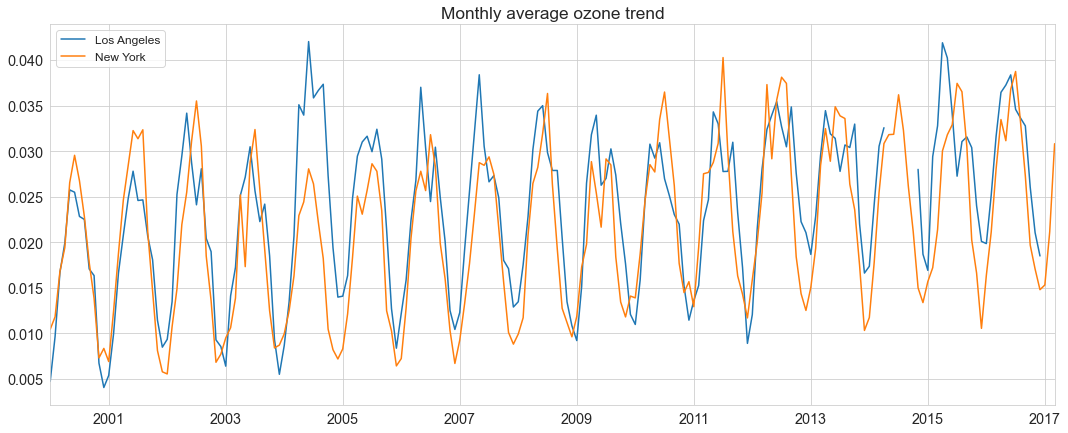

In [40]:
ozone.resample("M").mean().plot(title = "Monthly average ozone trend")
plt.xlabel(None)
plt.show()

**Calculate and plot the yearly average ozone trend**

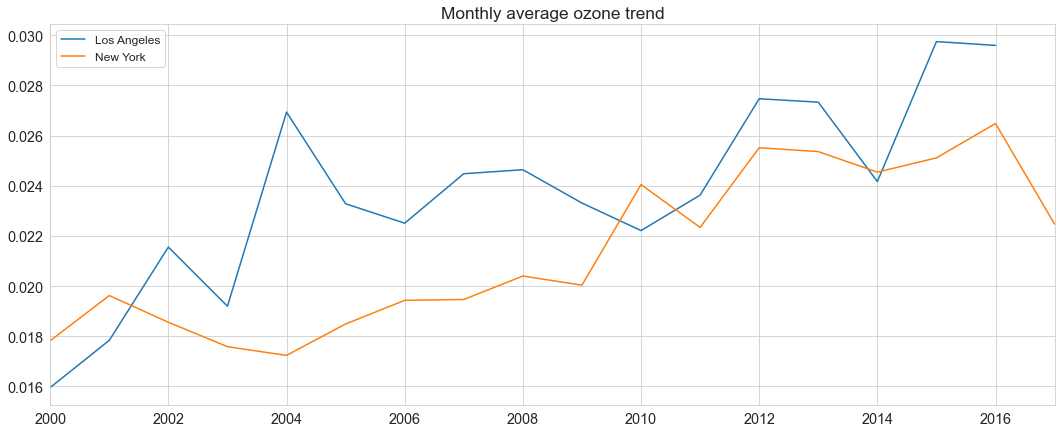

In [41]:
ozone.resample("Y").mean().plot(title = "Monthly average ozone trend")
plt.xlabel(None)
plt.show()

### Compare monthly average stock prices for Facebook and Google

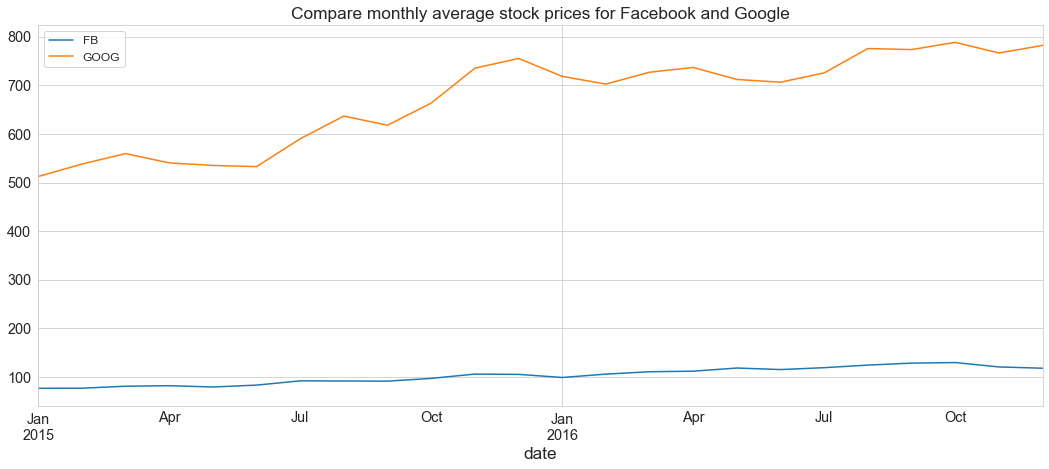

In [42]:
fg = pd.read_csv("goog_fb.csv", index_col = "date", parse_dates = ["date"])

fg.resample("M").mean().plot(title = "Compare monthly average stock prices for Facebook and Google")
plt.show()

### Visualize monthly mean, median and standard deviation of S&P500 returns

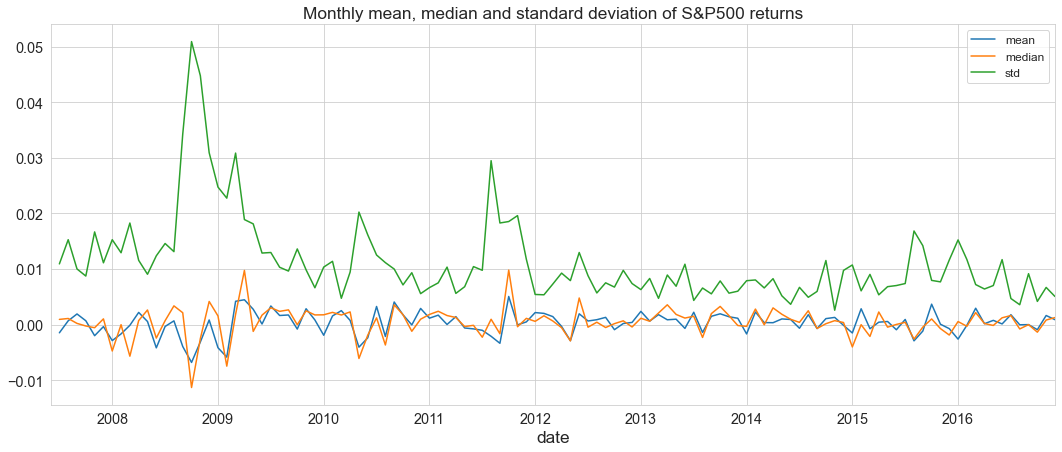

In [43]:
# Import data here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

# Plot stats here
stats.plot(title = "Monthly mean, median and standard deviation of S&P500 returns")
plt.show()

### Rolling average air quality since 2010 for new york city

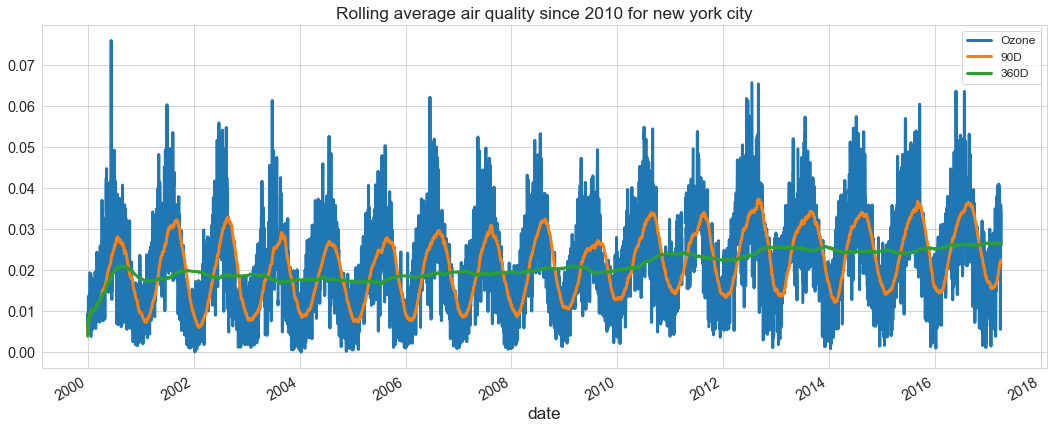

In [44]:
# Import and inspect ozone data here
data = pd.read_csv("ozone_nyc.csv", index_col = "date", parse_dates = ["date"])

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data["Ozone"].rolling(window = "90D").mean()
data['360D'] = data["Ozone"].rolling(window = "360D").mean()

# Plot data
data.plot(title = "Rolling average air quality since 2010 for new york city", linewidth = 3)
plt.show()

### Rolling 360-day median & std. deviation for nyc ozone data since 2000

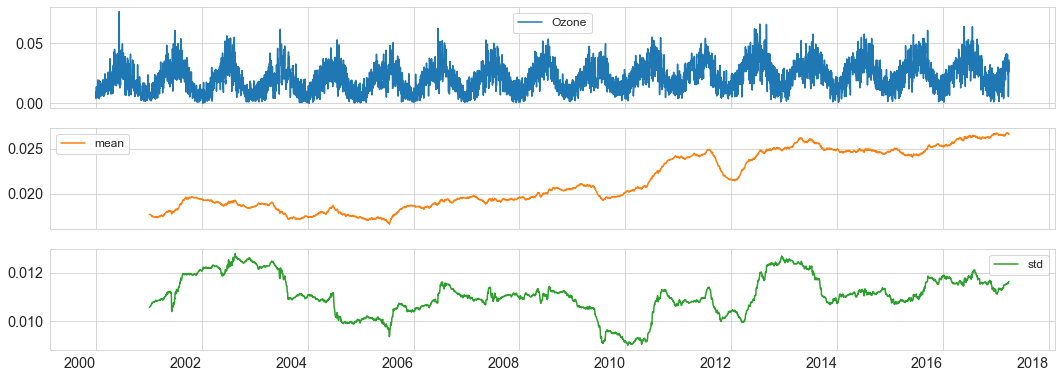

In [45]:
# Import and inspect ozone data here
data = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
plt.xlabel(None)
plt.xticks(rotation = 0)
plt.show()

### Rolling quantiles for daily air quality in nyc

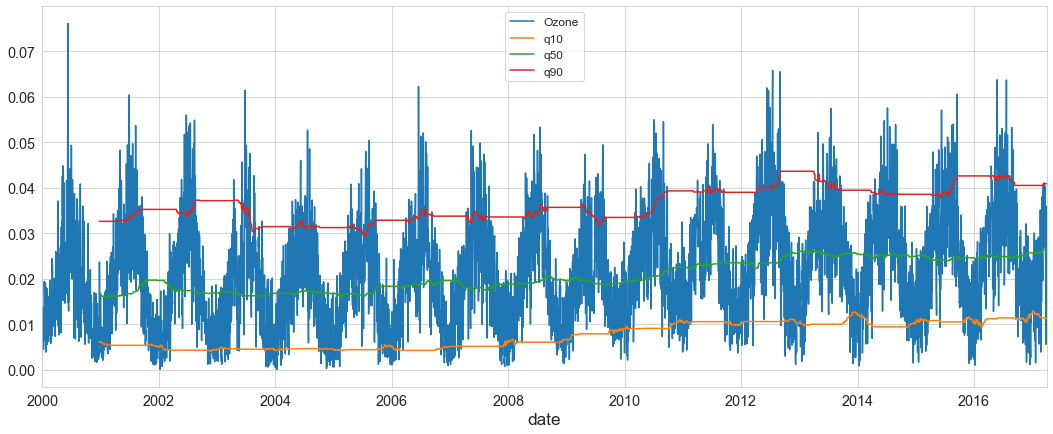

In [46]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()

# Create the rolling window
rolling = data.rolling(360)['Ozone']

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)

# Plot the data
data.plot()
plt.show()

### Cumulative return on Dollar 1,000 invested in google vs apple I

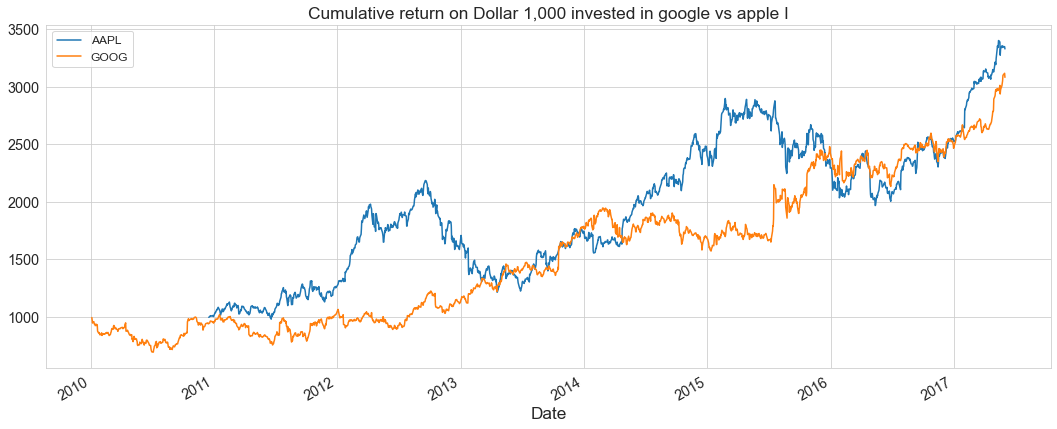

In [47]:
data = pd.read_csv("apple_google.csv", index_col = "Date", parse_dates = ["Date"])

# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns + 1
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot(title = "Cumulative return on Dollar 1,000 invested in google vs apple I")
plt.show()

### Annual return correlations among several stocks

In [48]:
stocks_5 = pd.read_csv("5_stocks.csv", index_col = "Date", parse_dates = ["Date"]) 
stocks_5.head()

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-07-05,1.66,15.27,NaN,NaN,NaN
2001-07-06,1.57,15.27,106.50,47.34,43.40
2001-07-09,1.62,15.81,104.72,48.25,43.36
2001-07-10,1.51,15.61,101.96,47.50,42.88
2001-07-11,1.61,15.34,103.85,48.85,42.48


In [49]:
# Calculate year-end prices
annual_prices = stocks_5.resample("A").last()
annual_prices.head()

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-12-31,1.56,10.82,120.96,57.55,39.30
2002-12-31,1.02,18.89,77.50,50.51,34.94
2003-12-31,1.53,52.62,92.68,53.05,41.00
2004-12-31,4.60,44.29,98.58,52.82,51.26
2005-12-31,10.27,47.15,82.20,46.80,56.17


In [50]:
# Calculate annual returns here
annual_returns = annual_prices.pct_change()
annual_returns.head()

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-12-31,NaN,NaN,NaN,NaN,NaN
2002-12-31,-0.346154,0.745841,-0.359292,-0.122328,-0.110941
2003-12-31,0.500000,1.785601,0.195871,0.050287,0.173440
2004-12-31,2.006536,-0.158305,0.063660,-0.004336,0.250244
2005-12-31,1.232609,0.064574,-0.166159,-0.113972,0.095786


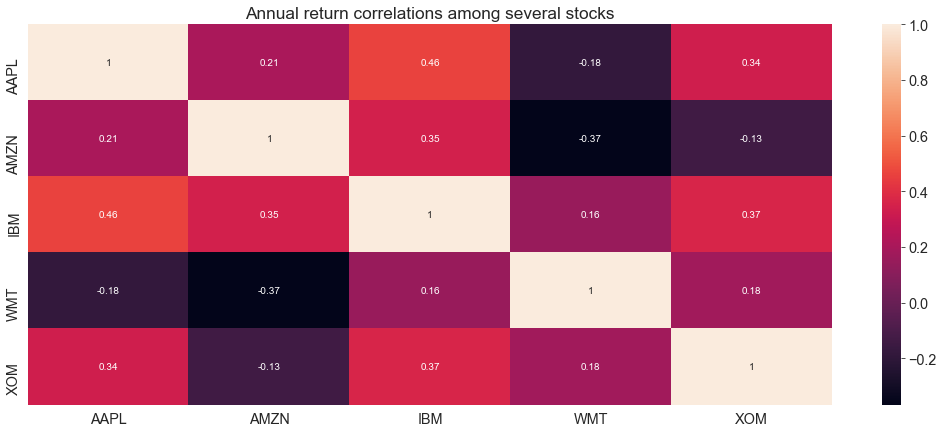

In [51]:
plt.figure(figsize = (18, 7))
plt.title("Annual return correlations among several stocks")
sns.heatmap(annual_returns.corr(), annot = True)
plt.show()